## Library

In [1]:
import math
import random
import numpy as np
import squigglepy as sq
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('utils.py').read())
print('Loaded')

Loaded


In [7]:
def plot_anchor(anchor, bins=100, alpha=1, label=None):
    plt.hist(anchor, bins=bins, alpha=alpha, label=label)
    if label:
        print(label)
    pprint(sq.get_percentiles(anchor))
    print('-')
    return None


def tai_log_flop_needs(brain, efficiency, transformative_vs_human, horizon_length, scaling_exponent,
                       flops_per_param_per_sec, params=None, ref_params=11.2, ref_params_samples=12,
                       bayes_update=None):
    params_ = brain + efficiency - flops_per_param_per_sec if params is None else params
    dist = ((brain + efficiency + transformative_vs_human + horizon_length + ref_params_samples) -
            (scaling_exponent * ref_params) + (scaling_exponent * params_))
    
    if bayes_update is None:
        return dist
    else:
        return sq.dist_fn(dist, bayes_update)


@np.vectorize
def cotra_bayes_update_against_low_flop(f):
    f = f + ~sq.norm(1,3) if f < 27 and random.random() > 0.3 else f
    f = f + ~sq.norm(1,3) if f < 26 and random.random() > 0.2 else f
    f = f + ~sq.norm(1,3) if f < 25 and random.random() > 0.1 else f
    f = f + ~sq.norm(1,3) if f < 24 else f
    f = 24 if f < 24 else f
    return f


def cotra_anchor(horizon_length, bayes_update=cotra_bayes_update_against_low_flop):
    return tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                              efficiency=1,
                              transformative_vs_human=sq.norm(-2,2),
                              horizon_length=horizon_length,
                              scaling_exponent=sq.norm(0.5,1.1),
                              flops_per_param_per_sec=sq.norm(1,2),
                              bayes_update=bayes_update)


print('Loaded')

Loaded


## Cotra's Short NN Anchor

{1: 25.16105723265356,
 5: 26.455089879388055,
 10: 27.195508951625772,
 20: 28.189506103385014,
 30: 29.23257467147501,
 40: 30.491074583711303,
 50: 31.71056815586652,
 60: 32.91272714446074,
 70: 34.28471252970693,
 80: 35.9279999451288,
 90: 38.415886047933114,
 95: 40.42048763864224,
 99: 44.81232469807018}
-


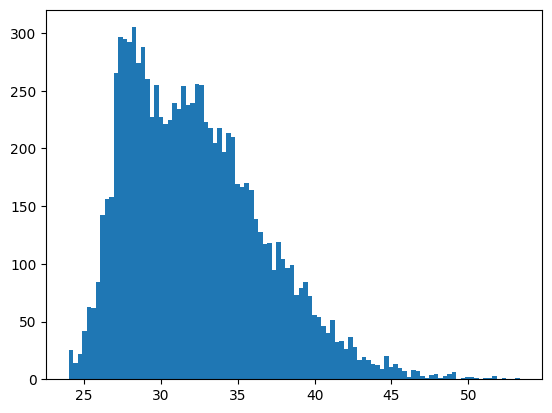

In [9]:
short_horizon_nn_anchor = cotra_anchor(horizon_length=sq.norm(0,3))
plot_anchor(short_horizon_nn_anchor @ 10000)

Cotra's Short NN, Before update
{1: 21.05962453757795,
 5: 24.03341563323909,
 10: 25.63777625824652,
 20: 27.748528887358134,
 30: 29.259028845261557,
 40: 30.516208313997684,
 50: 31.803444153558743,
 60: 33.013415203849846,
 70: 34.39473525131816,
 80: 36.116085559600705,
 90: 38.468371720769724,
 95: 40.39229690076012,
 99: 44.61185098316746}
-
Cotra's Short NN, After update
{1: 25.134219354340743,
 5: 26.398065284073663,
 10: 27.154556456953955,
 20: 28.149026598378097,
 30: 29.191012144349287,
 40: 30.491583061795897,
 50: 31.67605245904231,
 60: 32.92438642537002,
 70: 34.32687437256172,
 80: 35.95104174873917,
 90: 38.44909776765863,
 95: 40.380990997111574,
 99: 44.290346356941434}
-


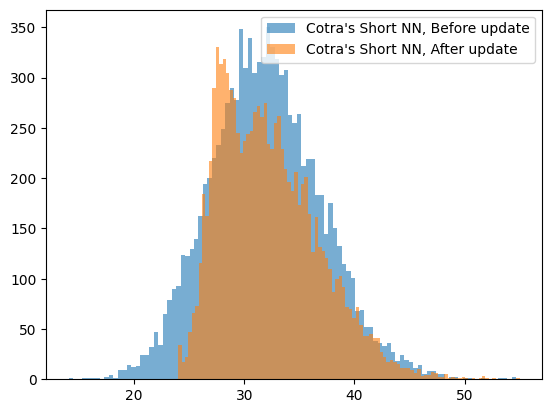

In [10]:
short_no_update = cotra_anchor(horizon_length=sq.norm(0,3), bayes_update=None)
plot_anchor(short_no_update @ 10000, alpha=0.6, label='Cotra\'s Short NN, Before update')
plot_anchor(short_horizon_nn_anchor @ 10000, alpha=0.6, label='Cotra\'s Short NN, After update')
plt.legend()

## Cotra's Medium NN Anchor

{1: 26.42234599547628,
 5: 27.78145160593252,
 10: 28.832024501785586,
 20: 30.774172898790937,
 30: 32.24841126382659,
 40: 33.49952058014343,
 50: 34.73073736088431,
 60: 36.01599754988603,
 70: 37.38926052383683,
 80: 38.9417812589354,
 90: 41.34384538119613,
 95: 43.28824427281434,
 99: 47.47584354362665}
-


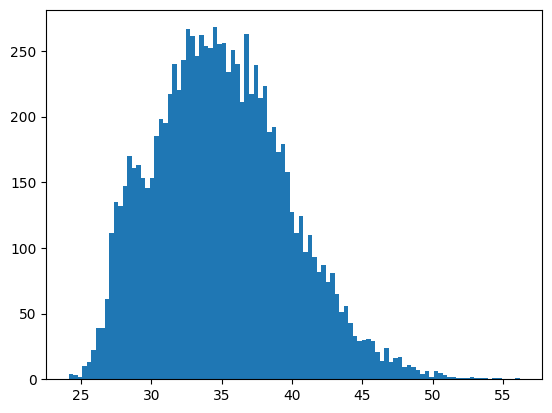

In [11]:
medium_horizon_nn_anchor = cotra_anchor(horizon_length=sq.norm(3,6))
plot_anchor(medium_horizon_nn_anchor @ 10000)

## Cotra's Long NN Anchor

{1: 27.65224325458641,
 5: 30.159357450018305,
 10: 31.691305872774077,
 20: 33.573554215133534,
 30: 35.04728747792548,
 40: 36.355308846453035,
 50: 37.62176761613952,
 60: 38.9027991468722,
 70: 40.32015716172181,
 80: 41.913235790930244,
 90: 44.40663189623936,
 95: 46.53950304139911,
 99: 50.588636552087245}
-


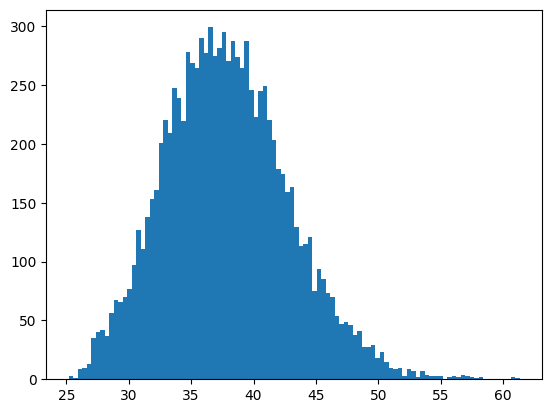

In [12]:
long_horizon_nn_anchor = cotra_anchor(horizon_length=sq.norm(6,9))
plot_anchor(long_horizon_nn_anchor @ 10000)

## Cotra's GPT Anchor

{1: 24.750636507992024,
 5: 25.97256013677632,
 10: 26.587006025864827,
 20: 27.473160034031586,
 30: 28.22721756650413,
 40: 29.07961378636794,
 50: 30.171215326931893,
 60: 31.399961935741512,
 70: 32.74038212141555,
 80: 34.35156910012661,
 90: 36.72801414482419,
 95: 38.725462330367236,
 99: 42.48716112021108}
-


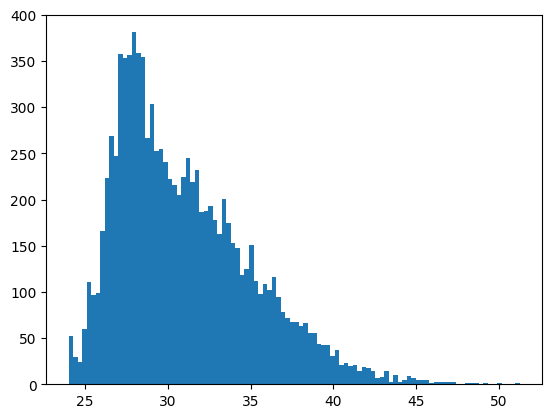

In [13]:
gpt_anchor = cotra_anchor(horizon_length=0)
plot_anchor(gpt_anchor @ 10000)

Cotra's GPT NN, Before update
{1: 19.81390074534276,
 5: 22.72341201667706,
 10: 24.254695527529144,
 20: 26.210696973749155,
 30: 27.722317121105295,
 40: 28.97629105857401,
 50: 30.161310546167222,
 60: 31.44399074849902,
 70: 32.776222264596406,
 80: 34.40930182849493,
 90: 36.88083881296565,
 95: 38.886222704321035,
 99: 42.855170905607004}
-
Cotra's GPT NN, After update
{1: 24.576482271564227,
 5: 25.906680614404287,
 10: 26.57255711345587,
 20: 27.490121873956188,
 30: 28.202080223161307,
 40: 29.051529710114167,
 50: 30.22309043002868,
 60: 31.485697812217403,
 70: 32.79453358324413,
 80: 34.43316454952792,
 90: 36.82126025794095,
 95: 39.09919189161487,
 99: 42.85720696216041}
-


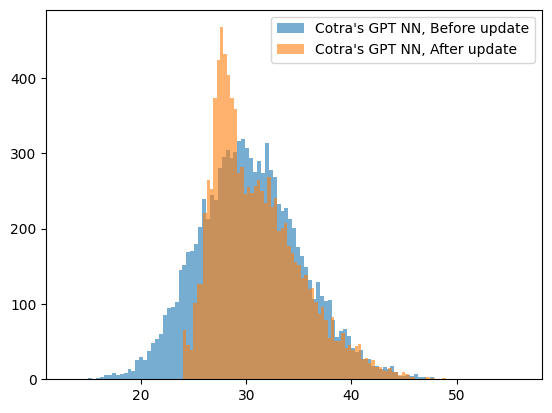

In [15]:
gpt_no_update = cotra_anchor(horizon_length=0, bayes_update=None)
plot_anchor(gpt_no_update @ 10000, alpha=0.6, label='Cotra\'s GPT NN, Before update')
plot_anchor(gpt_anchor @ 10000, alpha=0.6, label='Cotra\'s GPT NN, After update')
plt.legend()

## Cotra's Lifetime Anchor

{1: 25.176731770815806,
 5: 26.08559528162631,
 10: 26.61973090740235,
 20: 27.2937462318204,
 30: 27.815576796870413,
 40: 28.367231308496507,
 50: 28.947603328996227,
 60: 29.736286754424565,
 70: 30.677638955150883,
 80: 31.887391828716492,
 90: 33.60685092494915,
 95: 35.059728796763025,
 99: 37.840498577730266}
-


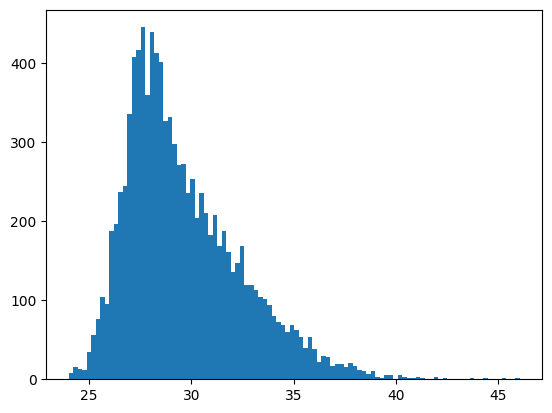

In [17]:
lifetime_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                     efficiency=sq.mixture([sq.lognorm(2,5),
                                                            sq.lognorm(5,9)]),
                                     transformative_vs_human=sq.norm(-2,2),
                                     horizon_length=9,
                                     scaling_exponent=0,
                                     flops_per_param_per_sec=0,
                                     ref_params_samples=0,
                                     bayes_update=cotra_bayes_update_against_low_flop)
plot_anchor(lifetime_anchor @ 10000)

## Cotra's Evolution Anchor

{1: 32.09058032054107,
 5: 34.569868294451666,
 10: 36.00815843596094,
 20: 37.7303471773539,
 30: 38.90558296959524,
 40: 39.89091116976313,
 50: 40.848658685582876,
 60: 41.791879668786514,
 70: 42.84041924914862,
 80: 44.03248224249601,
 90: 45.67382519648773,
 95: 46.98558247162088,
 99: 49.578162717806805}
-


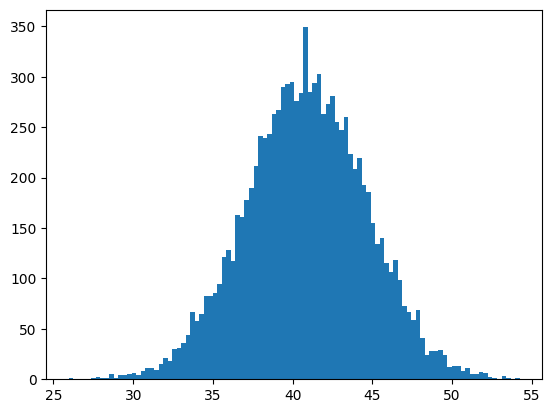

In [18]:
average_ancestor_brain_flops = sq.lognorm(3,6)
log_n_individuals = sq.norm(20,22)
evo_time_log_sec = 16
evolution_anchor = tai_log_flop_needs(brain=average_ancestor_brain_flops,
                                      efficiency=sq.norm(-6,5), # TODO: This seems not quite right
                                      transformative_vs_human=sq.norm(-2,2),
                                      horizon_length=log_n_individuals + evo_time_log_sec,
                                      scaling_exponent=0,
                                      flops_per_param_per_sec=0,
                                      ref_params_samples=0,
                                      bayes_update=None)
plot_anchor(evolution_anchor @ 10000)


## Cotra's Genome Anchor

{1: 26.650278505151146,
 5: 27.910726343679862,
 10: 28.931349154904275,
 20: 30.45498185848855,
 30: 31.64690019918344,
 40: 32.734165336445784,
 50: 33.72967450446728,
 60: 34.75142080806098,
 70: 35.866324910939184,
 80: 37.14039046123538,
 90: 39.00263088819348,
 95: 40.57218171218445,
 99: 43.82554377120207}
-


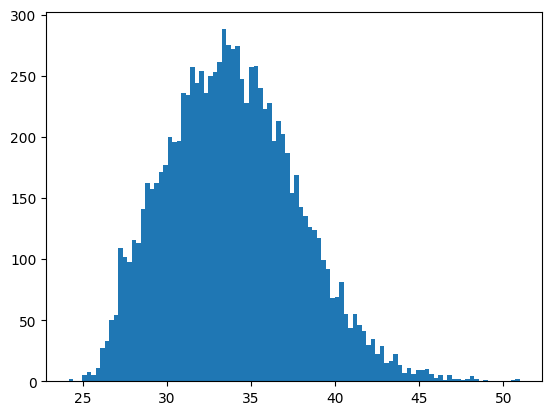

In [19]:
genome_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                   params=sq.norm(mean=8.7, sd=0.35), # There are ~10^8.7 'params' in genome
                                   efficiency=sq.norm(0,2),
                                   transformative_vs_human=sq.norm(-2,2),
                                   horizon_length=sq.norm(7,9),
                                   scaling_exponent=sq.norm(0.5,1.1),
                                   flops_per_param_per_sec=sq.norm(1,2),
                                   bayes_update=cotra_bayes_update_against_low_flop)
plot_anchor(genome_anchor @ 10000)


## All Cotra Anchors

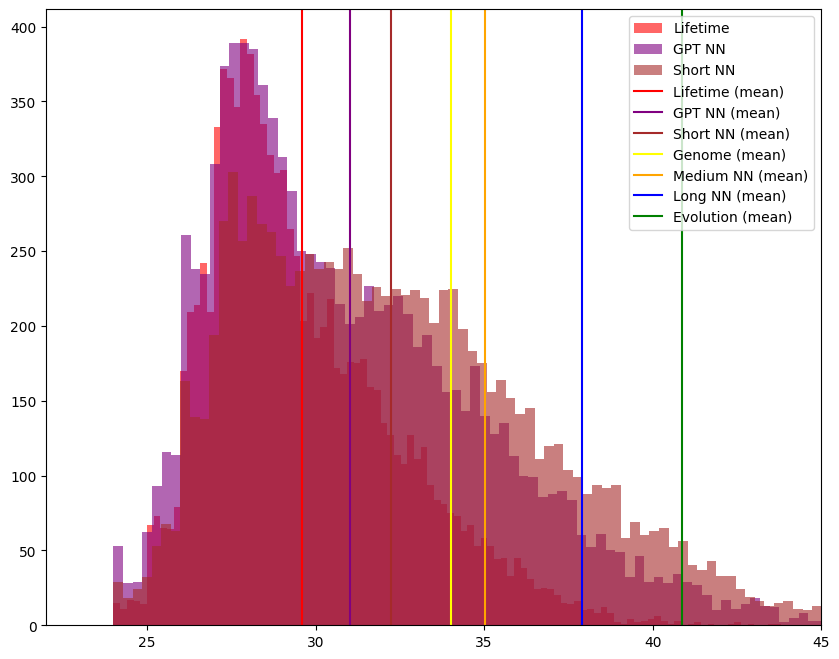

In [20]:
def plot_anchor_means():
    plt.axvline(np.mean(lifetime_anchor @ 10000), label='Lifetime (mean)', color='red')
    plt.axvline(np.mean(gpt_anchor @ 10000), label='GPT NN (mean)', color='purple')
    plt.axvline(np.mean(short_horizon_nn_anchor @ 10000), label='Short NN (mean)', color='brown')
    plt.axvline(np.mean(genome_anchor @ 10000), label='Genome (mean)', color='yellow')
    plt.axvline(np.mean(medium_horizon_nn_anchor @ 10000), label='Medium NN (mean)', color='orange')
    plt.axvline(np.mean(long_horizon_nn_anchor @ 10000), label='Long NN (mean)', color='blue')
    plt.axvline(np.mean(evolution_anchor @ 10000), label='Evolution (mean)', color='green')

    
alpha = 0.6
bins = 100

plt.figure(figsize=(10,8))
plt.hist(lifetime_anchor @ 10000, bins=bins, alpha=alpha, label='Lifetime', color='red', lw=0)
plt.hist(gpt_anchor @ 10000, bins=bins, alpha=alpha, label='GPT NN', color='purple', lw=0)
plt.hist(short_horizon_nn_anchor @ 10000, bins=bins, alpha=alpha, label='Short NN', color='brown', lw=0)
plot_anchor_means()
plt.xlim([22, 45])
plt.legend()
plt.show()

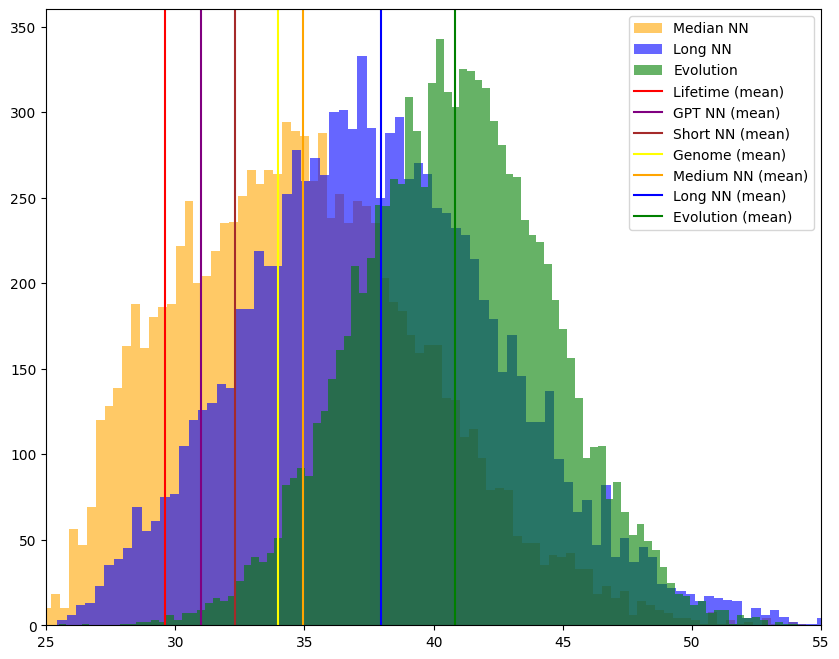

In [21]:
plt.figure(figsize=(10,8))
plt.hist(medium_horizon_nn_anchor @ 10000, bins=bins, alpha=alpha, label='Median NN', color='orange', lw=0)
plt.hist(long_horizon_nn_anchor @ 10000, bins=bins, alpha=alpha, label='Long NN', color='blue', lw=0)
plt.hist(evolution_anchor @ 10000, bins=bins, alpha=alpha, label='Evolution', color='green', lw=0)
plot_anchor_means()
plt.xlim([25, 55])
plt.legend()
plt.show()

## Simple Lifetime Anchor

Simple lifetime, before update
{1: 18.841871395550875,
 5: 19.963038321319075,
 10: 20.66695755187446,
 20: 21.644099618493296,
 30: 22.349824714316604,
 40: 22.985554908703516,
 50: 23.630418190548745,
 60: 24.271171804252546,
 70: 25.03006090994807,
 80: 25.97134186951086,
 90: 27.343885319401547,
 95: 28.52287233357786,
 99: 31.215034668009395}
-
Simple lifetime, after update
{1: 24.0,
 5: 24.627214610397896,
 10: 25.094464630189492,
 20: 25.548847546173533,
 30: 25.996201831955723,
 40: 26.299954015070288,
 50: 26.610081660386943,
 60: 26.96876146174357,
 70: 27.31353607026672,
 80: 27.745321771691607,
 90: 28.386139272712533,
 95: 29.00084377477781,
 99: 31.023824063578743}
-
Cotra's lifetime anchor
{1: 25.123886948708343,
 5: 26.075331619433722,
 10: 26.586805365014378,
 20: 27.276405725468223,
 30: 27.80584881317571,
 40: 28.34072797745647,
 50: 28.936276588488546,
 60: 29.726186935876612,
 70: 30.724547631529067,
 80: 31.87299311020733,
 90: 33.652285852289985,
 95: 35.02481667

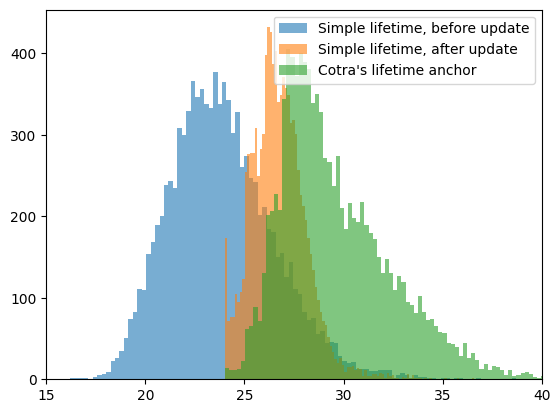

In [22]:
simple_lifetime_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                            efficiency=0,
                                            transformative_vs_human=0,
                                            horizon_length=9,
                                            scaling_exponent=0,
                                            flops_per_param_per_sec=0,
                                            ref_params_samples=0,
                                            bayes_update=cotra_bayes_update_against_low_flop)

simple_lifetime_anchor_noup = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                                 efficiency=0,
                                                 transformative_vs_human=0,
                                                 horizon_length=9,
                                                 scaling_exponent=0,
                                                 flops_per_param_per_sec=0,
                                                 ref_params_samples=0,
                                                 bayes_update=None)

plot_anchor(simple_lifetime_anchor_noup @ 10000, alpha=0.6, label='Simple lifetime, before update')
plot_anchor(simple_lifetime_anchor @ 10000, alpha=0.6, label='Simple lifetime, after update')
plot_anchor(lifetime_anchor @ 10000, alpha=0.6, label='Cotra\'s lifetime anchor')
plt.xlim([15, 40])
plt.legend()


## Updated Evolution Anchor

Cotra's evolution anchor
{1: 32.06924181289526,
 5: 34.70093065702019,
 10: 36.06421672829001,
 20: 37.6639693977558,
 30: 38.875065882201234,
 40: 39.92048497933534,
 50: 40.90792503772878,
 60: 41.832410853522084,
 70: 42.790642820904914,
 80: 43.95246206629967,
 90: 45.615338415276646,
 95: 46.90413351589504,
 99: 49.34288472337551}
-
Updated evolution anchor
{1: 31.986882761036377,
 5: 34.81467487475534,
 10: 36.314847621822715,
 20: 38.01147219214088,
 30: 39.22756491371386,
 40: 40.29235775032822,
 50: 41.277127095877304,
 60: 42.24909434837566,
 70: 43.389033462820706,
 80: 44.70793186958797,
 90: 46.54814345746427,
 95: 47.95784077103611,
 99: 50.76836513727655}
-


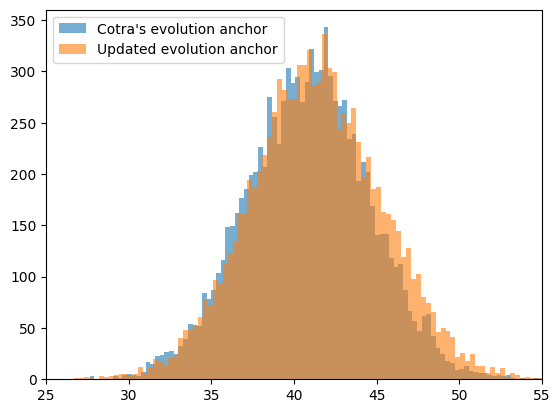

In [27]:
anthropic_adjustment = sq.norm(-1.3,1.3)
environment_adjustment = sq.mixture([[0.2, sq.lognorm(1,5)], [0.8, 0]])
    
updated_evolution_anchor = evolution_anchor + anthropic_adjustment + environment_adjustment
plot_anchor(evolution_anchor @ 10000, alpha=alpha, label='Cotra\'s evolution anchor')
plot_anchor(updated_evolution_anchor @ 10000, alpha=alpha, label='Updated evolution anchor')
plt.xlim([25, 55])
plt.legend()


## Meta-anchor

### Horizon length

{1: 0.0,
 5: 0.0,
 10: 0.0,
 20: 0.0,
 30: 0.0,
 40: 0.0,
 50: 1.4927350174455345,
 60: 2.9529809304319308,
 70: 4.281691701709567,
 80: 5.701384726783719,
 90: 8.477192349427181,
 95: 9.565448913480912,
 99: 10.925626513644147}
-


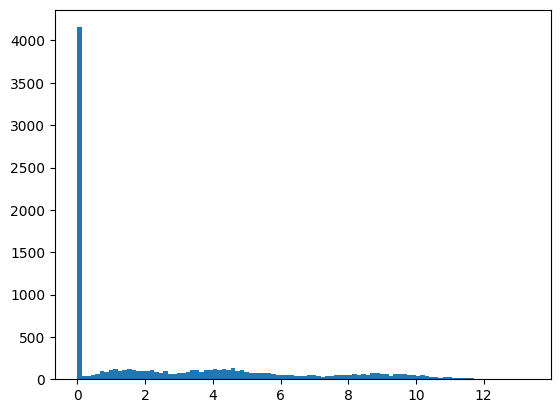

In [29]:
meta_horizon_length = sq.mixture([[0.4, 0],
                                  [0.2, sq.norm(0,3)],
                                  [0.25, sq.lognorm(3,7)],
                                  [0.15, sq.norm(7,11)]], lclip=0)

plot_anchor(meta_horizon_length @ 10000)

100%|██████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 3937204.54it/s]


Writing cache to file `caches/meta_anchor.sqcache.pkl`...
...Cached
{1: 19.51442579759248,
 5: 24.09681815678129,
 10: 25.298177862352397,
 20: 26.921552923486843,
 30: 28.704086115867877,
 40: 30.676466923755562,
 50: 32.52715347903024,
 60: 34.45454242769943,
 70: 36.528940762792566,
 80: 39.08555989442817,
 90: 42.87866559508511,
 95: 45.85686277860358,
 99: 51.52593269057209}
-


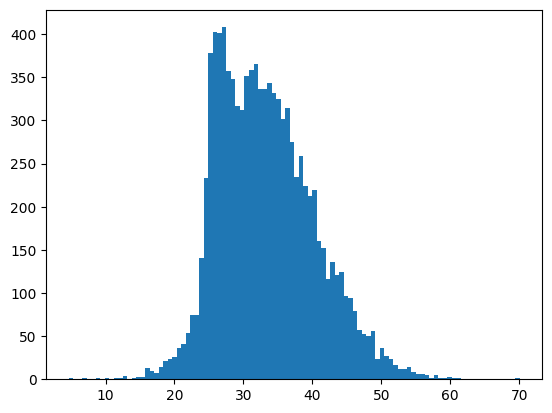

In [59]:
@np.vectorize
def peter_bayes_update_against_low_flop(f):
    f = f + sq.sample(sq.norm(1,3)) if f < 27 and random.random() > 0.9 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 26 and random.random() > 0.8 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 25 and random.random() > 0.4 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 24 and random.random() > 0.1 else f
    return f

meta_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                 efficiency=sq.norm(-1,2),
                                 transformative_vs_human=sq.norm(-2,2),
                                 horizon_length=meta_horizon_length,
                                 scaling_exponent=sq.norm(0.5,1.5),
                                 flops_per_param_per_sec=sq.norm(1,2),
                                 bayes_update=peter_bayes_update_against_low_flop)
meta_anchor_samples = sq.sample(meta_anchor, dump_cache_file='caches/meta_anchor', n=10000, verbose=True)
plot_anchor(meta_anchor_samples)


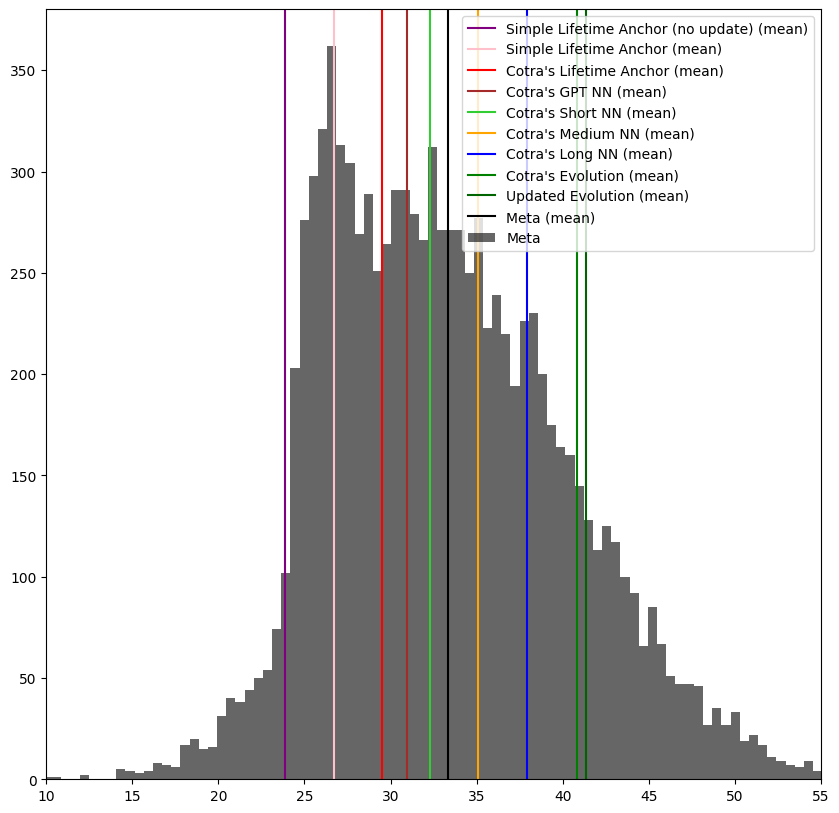

In [53]:
plt.figure(figsize=(10,10))
plt.axvline(x = np.mean(simple_lifetime_anchor_noup @ 10000), label='Simple Lifetime Anchor (no update) (mean)', color='purple')
plt.axvline(x = np.mean(simple_lifetime_anchor @ 10000), label='Simple Lifetime Anchor (mean)', color='pink')
plt.axvline(x = np.mean(lifetime_anchor @ 10000), label='Cotra\'s Lifetime Anchor (mean)', color='red')
plt.axvline(x = np.mean(gpt_anchor @ 10000), label='Cotra\'s GPT NN (mean)', color='brown')
plt.axvline(x = np.mean(short_horizon_nn_anchor @ 10000), label='Cotra\'s Short NN (mean)', color='limegreen')
plt.axvline(x = np.mean(medium_horizon_nn_anchor @ 10000), label='Cotra\'s Medium NN (mean)', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor @ 10000), label='Cotra\'s Long NN (mean)', color='blue')
plt.axvline(x = np.mean(evolution_anchor @ 10000), label='Cotra\'s Evolution (mean)', color='green')
plt.axvline(x = np.mean(updated_evolution_anchor @ 10000), label='Updated Evolution (mean)', color='darkgreen')
plt.axvline(x = np.mean(meta_anchor @ 10000), label='Meta (mean)', color='black')
plt.hist(meta_anchor @ 10000, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.xlim([10, 55])
plt.legend()
plt.show()

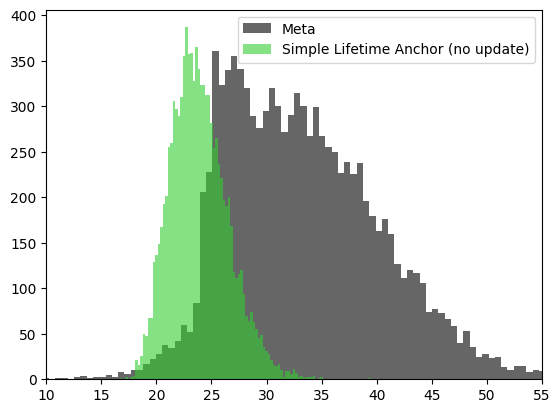

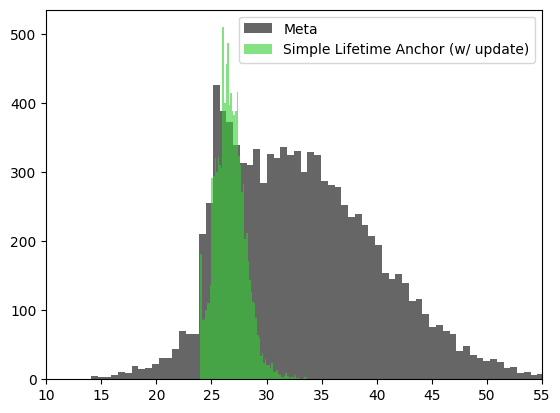

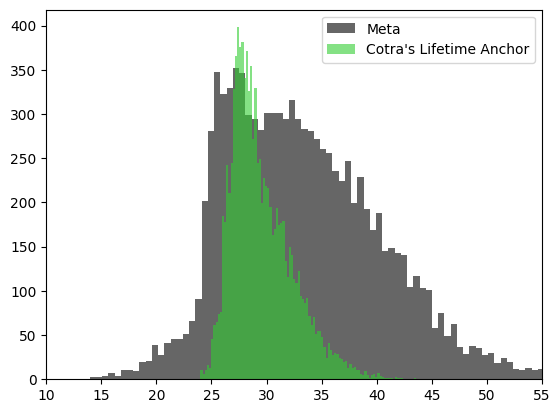

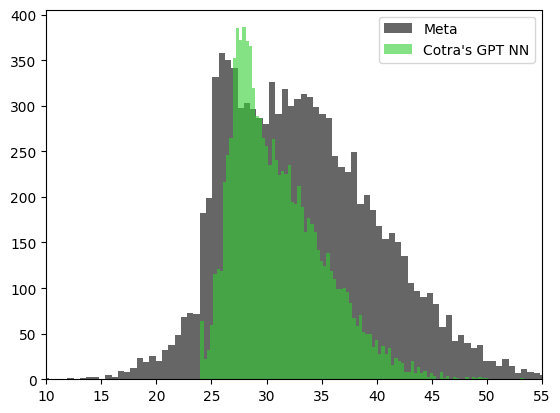

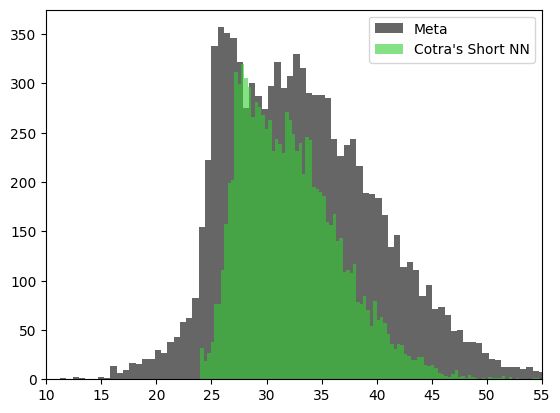

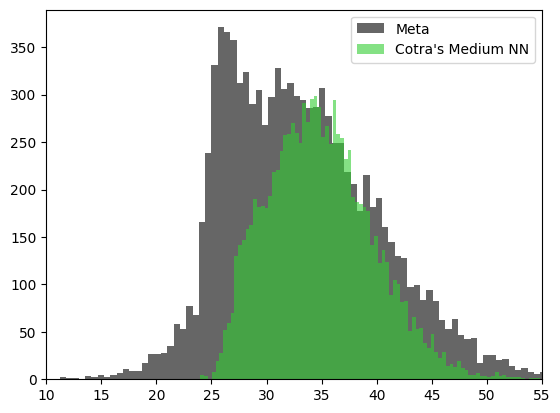

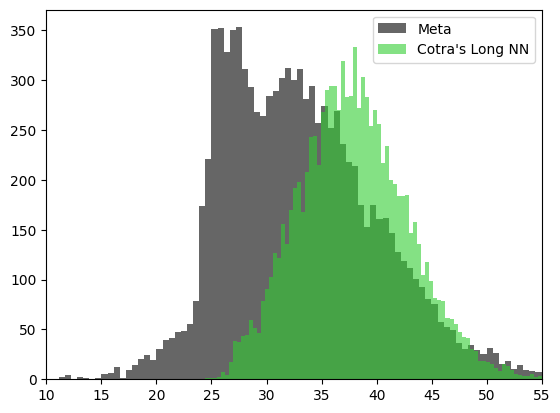

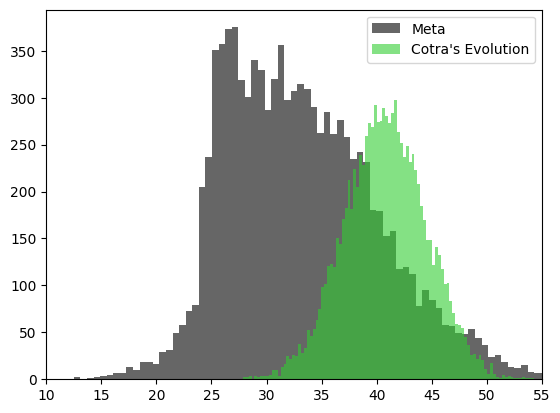

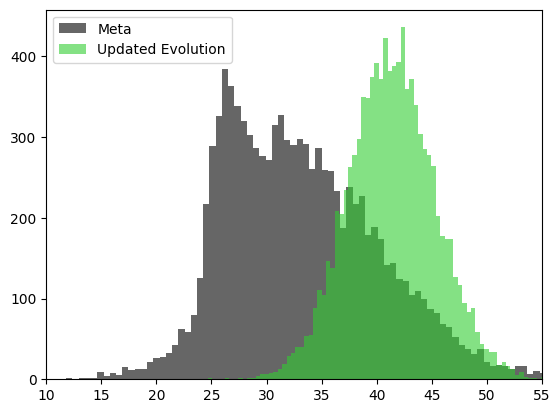

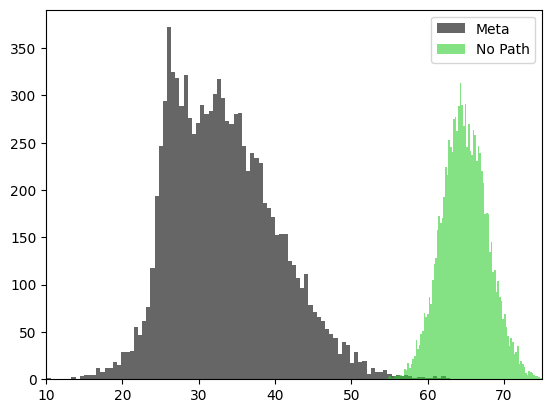

In [54]:
no_path_anchor = sq.lognorm(60,70)

for anchors in [[simple_lifetime_anchor_noup @ 10000, 'Simple Lifetime Anchor (no update)'],
                [simple_lifetime_anchor @ 10000, 'Simple Lifetime Anchor (w/ update)'],
                [lifetime_anchor @ 10000, 'Cotra\'s Lifetime Anchor'],
                [gpt_anchor @ 10000, 'Cotra\'s GPT NN'],
                [short_horizon_nn_anchor @ 10000, 'Cotra\'s Short NN'],
                [medium_horizon_nn_anchor @ 10000, 'Cotra\'s Medium NN'],
                [long_horizon_nn_anchor @ 10000, 'Cotra\'s Long NN'],
                [evolution_anchor @ 10000, 'Cotra\'s Evolution'],
                [updated_evolution_anchor @ 10000, 'Updated Evolution'],
                [no_path_anchor @ 10000, 'No Path']]:
    plt.hist(meta_anchor @ 10000, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
    plt.hist(anchors[0], bins=bins, alpha=alpha, label=anchors[1], color='limegreen', lw=0)
    plt.xlim([10, 75 if anchors[1] == 'No Path' else 55])
    plt.legend()
    plt.show()

100%|█████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 5640.57it/s]


Writing cache to file `caches/cotra_2020.sqcache.pkl`...
...Cached
{1: 26.01998980552121,
 5: 27.386553944704612,
 10: 28.311831397932814,
 20: 30.307654805307187,
 30: 31.993784185715498,
 40: 33.59301874827483,
 50: 35.18222921211155,
 60: 36.88113302607926,
 70: 38.7273233540293,
 80: 41.156265320009666,
 90: 45.52205899139628,
 95: 63.02155724994742,
 99: 68.22320257676613}
-


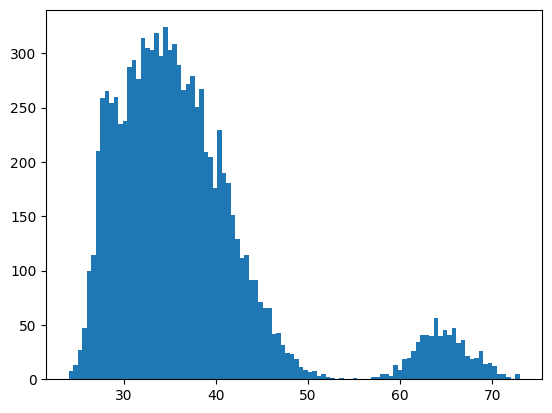

In [60]:
cotra_2020 = sq.mixture([[0.052, lifetime_anchor],
                         [0.21, short_horizon_nn_anchor],
                         [0.11, genome_anchor],
                         [0.312, medium_horizon_nn_anchor],
                         [0.155, long_horizon_nn_anchor],
                         [0.091, evolution_anchor],
                         [0.07, no_path_anchor]])
cotra_2020_samples = sq.sample(cotra_2020, dump_cache_file='caches/cotra_2020', n=10000, verbose=True)
plot_anchor(cotra_2020_samples)


100%|█████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 5189.56it/s]


Writing cache to file `caches/cotra_2022.sqcache.pkl`...
...Cached
{1: 25.41283558021864,
 5: 26.987107825454377,
 10: 27.766474534491007,
 20: 29.342781891338632,
 30: 30.95576234563556,
 40: 32.3762443461264,
 50: 33.76522955232872,
 60: 35.3043082558967,
 70: 37.05985793601957,
 80: 39.23960373987587,
 90: 43.071613710035294,
 95: 59.9851859401388,
 99: 67.16478689048657}
-


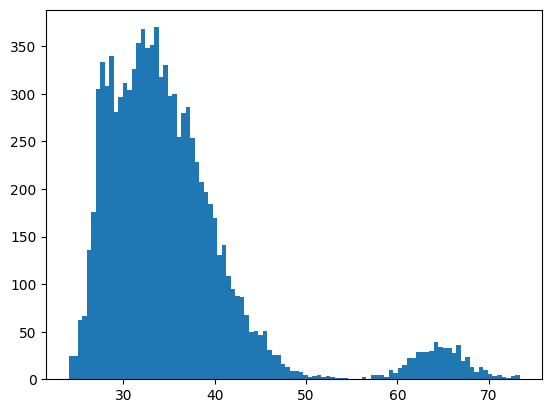

In [61]:
cotra_2022 = sq.mixture([[0.1, gpt_anchor],
                         [0.33, short_horizon_nn_anchor],
                         [0.09, genome_anchor],
                         [0.34, medium_horizon_nn_anchor],
                         [0.04, long_horizon_nn_anchor],
                         [0.05, evolution_anchor],
                         [0.05, no_path_anchor]])
cotra_2022_samples = sq.sample(cotra_2022, dump_cache_file='caches/cotra_2022', n=10000, verbose=True)
plot_anchor(cotra_2022_samples)


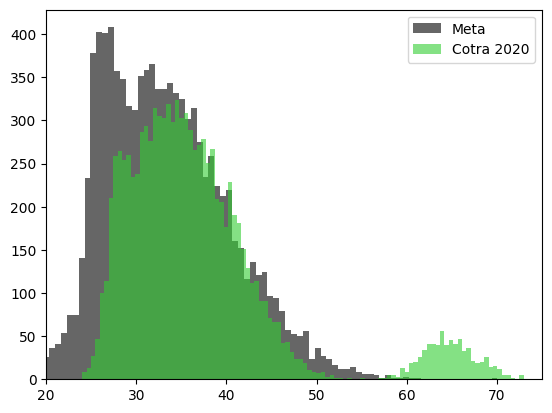

In [62]:
plt.hist(meta_anchor_samples, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.hist(cotra_2020_samples, bins=bins, alpha=alpha, label='Cotra 2020', color='limegreen', lw=0)
plt.xlim([20, 75])
plt.legend()
plt.show()


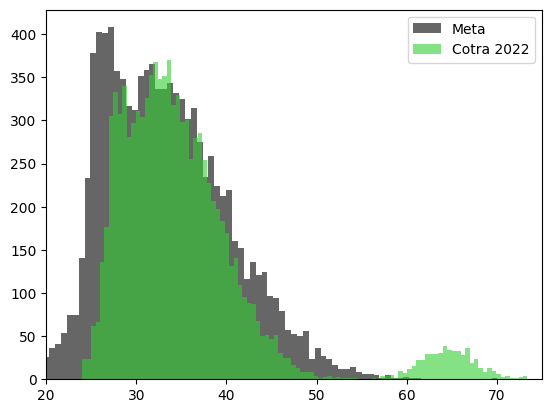

In [63]:
plt.hist(meta_anchor_samples, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.hist(cotra_2022_samples, bins=bins, alpha=alpha, label='Cotra 2022', color='limegreen', lw=0)
plt.xlim([20, 75])
plt.legend()
plt.show()


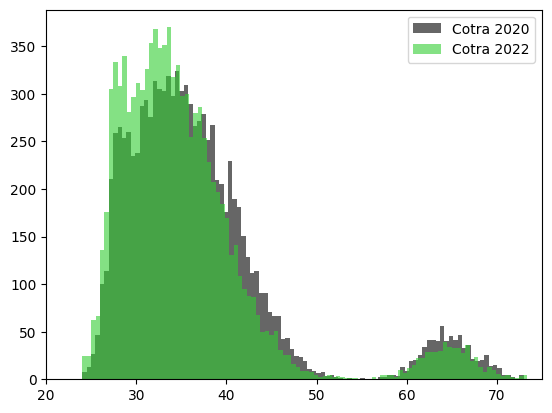

In [64]:
plt.hist(cotra_2020_samples, bins=bins, alpha=alpha, label='Cotra 2020', color='black', lw=0)
plt.hist(cotra_2022_samples, bins=bins, alpha=alpha, label='Cotra 2022', color='limegreen', lw=0)
plt.xlim([20, 75])
plt.legend()
plt.show()
